In [87]:
import pandas
import pandas as pd
from numpy import *
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot 
import plotly
import chart_studio.plotly as py
import plotly.offline as pyo
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import plotly.graph_objects as go


In [86]:
!pip install wordcloud

     |████████████████████████████████| 460 kB 30 kB/s  eta 0:00:01


## import the data

In [3]:
!pwd

/home/ctg/Share/L_posts


In [61]:
mutation_data=pd.read_csv("/home/ctg/Share/L_posts/Data/lnc_mutation.csv")
mutation_data.gene1.drop_duplicates()

0     RP11-34P13.14
3      LINC34P13.14
12           SNHG17
21         LINC0014
Name: gene1, dtype: object

In [77]:
# Add two columns with random values
# with random float values
mutation_data['VAF_tumor'] = np.round(np.random.uniform(0.0, 0.6, size=(len(mutation_data), 1)), 2)
# use random intergers
mutation_data['recurrence'] = np.random.randint(5, 50, size=(len(mutation_data), 1))
mutation_data['age'] = np.random.randint(0, 100, size=(len(mutation_data), 1))
mutation_data['sex'] = np.random.choice(['Male', 'Female'], size=len(mutation_data))
mutation_data['pathway'] = np.random.choice(['JAK-STAT','Hippo','P53'], size=len(mutation_data))

mutation_data.head()

,chrom,start,end,ref,alt,TumorRef,TumorAlt,NormalRef,NormalAlt,Read_depth_tumor,...,Sample,Pat,gene1,Sample1,Recurrence,VAF_tumor,recurrence,age,sex,pathway
0,1,137334,137334,C,T,8,4,10,0,RP11-34P13.14,...,AE04,A,RP11-34P13.14,AE04,10.0,0.20,34,5,Female,P53
1,1,136062,136062,T,C,26,4,61,1,RP11-34P13.14,...,PE12,P,RP11-34P13.14,PE12,21.0,0.13,37,68,Male,JAK-STAT
2,1,136690,136690,G,A,61,7,12,0,RP11-34P13.14,...,AL12,A,RP11-34P13.14,AL12,10.0,0.29,18,5,Male,Hippo
3,1,137515,137515,T,C,36,4,30,1,RP11-34P13.14,...,AL12,A,LINC34P13.14,AL12,20.0,0.45,9,14,Female,JAK-STAT
4,1,137515,137515,T,C,13,4,22,1,RP11-34P13.14,...,PE08,P,LINC34P13.14,PE08,20.0,0.46,7,62,Female,Hippo


## Visualization

#### The seaborn violin plot with numbers annotated as legends
- groupby the column gene1 and get the count using the fucntion size()
- use the those values for xticklabels

/tmp/ipykernel_9881/1301327761.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  xticklabels = ['{0}\nn={1}'.format(group, size) for group, size in sizes.iteritems()]


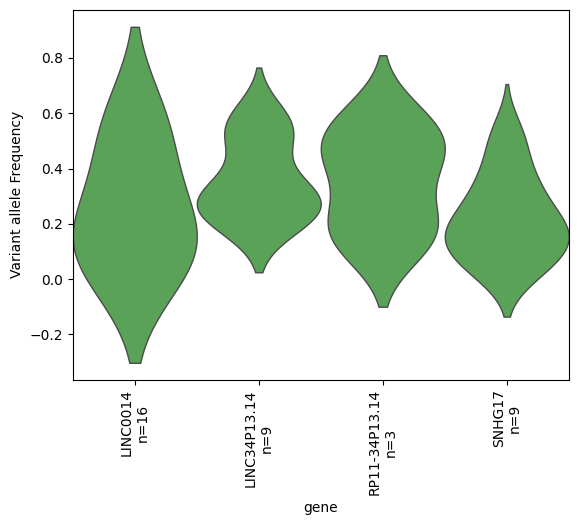

In [23]:
sns.set_context(rc={"figure.figsize": (17, 7)})
color_ordered = [u'#4daf4a']
col=[u'#e41a1c',u'#377eb8']
f, ax = plt.subplots()

sns.violinplot(x="gene1", y="VAF_tumor",data=mutation_data, palette=color_ordered, split=False,width=1,scale='width',inner=None,linewidth=1,alpha=0.001
              )
#sns.stripplot(x='gene', y='VAF_tumor', data=chr_pos_repeated_without_duplicates_m_lincRNA_REL,hue='Pat',palette=col)
sizes = mutation_data.groupby('gene1').size()
xticklabels = ['{0}\nn={1}'.format(group, size) for group, size in sizes.iteritems()]
ax.set(xticklabels=xticklabels,
       ylabel='Variant allele Frequency',xlabel='gene')

for item in ax.get_xticklabels():
    item.set_rotation(90)

#### Add striplot for adding values in the violin

/tmp/ipykernel_9881/992722305.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  xticklabels = ['{0}\nn={1}'.format(group, size) for group, size in sizes.iteritems()]


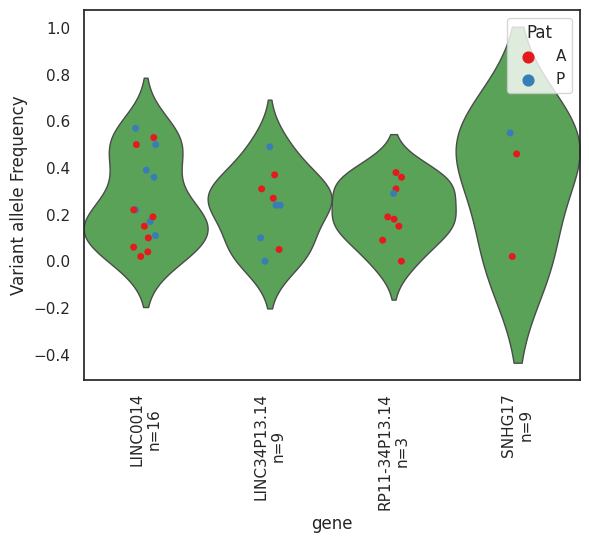

In [43]:
sns.set_context(rc={"figure.figsize": (17, 7)})
color_ordered = [u'#4daf4a']
col=[u'#e41a1c',u'#377eb8']
f, ax = plt.subplots()

sns.violinplot(x="gene1", y="VAF_tumor",data=mutation_data, palette=color_ordered, split=False,width=1,scale='width',inner=None,linewidth=1,alpha=0.001
              )
sns.stripplot(x='gene1', y='VAF_tumor', data=mutation_data,hue='Pat',palette=col)
sizes = mutation_data.groupby('gene1').size()
xticklabels = ['{0}\nn={1}'.format(group, size) for group, size in sizes.iteritems()]
ax.set(xticklabels=xticklabels,
       ylabel='Variant allele Frequency',xlabel='gene')

for item in ax.get_xticklabels():
    item.set_rotation(90)

#### Barplot

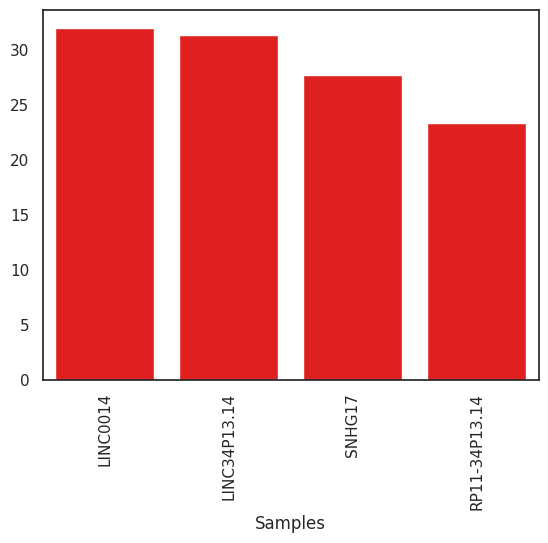

In [42]:
sns.set(font_scale=1,font='bold')
#sns.s
sns.set_style("white")
sns.set_context(rc={"figure.figsize": (5, 5)})
#clrs = ['blue' if (x == A*) else 'red' for x in table_Sample.Sample ]
#clrs = ['grey' if (x == A) else 'red' for x in table_Sample.Pat ]

ax=sns.barplot(x="gene1",y="recurrence",data=mutation_data,color="red",ci=None)# remove the error bars
ax.set(xlabel='Samples',
       ylabel='')
for item in ax.get_xticklabels():
    item.set_rotation(90)

#### sort the column and plot the genes on y axis

In [40]:
mutation_data.sort_values("recurrence",ascending=False,inplace=True)


[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Genes')]

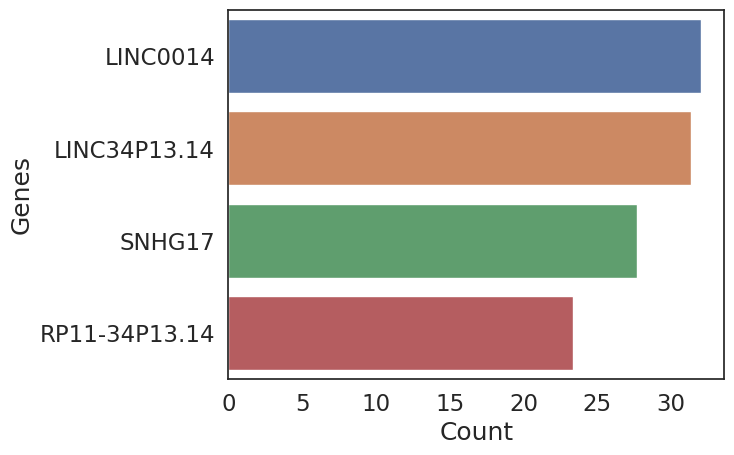

In [41]:
sns.set_context(rc={"figure.figsize": (10, 10)})
f=sns.barplot(x="recurrence",y="gene1", data=mutation_data,ci=None)
f.set(xlabel='Count', ylabel='Genes')

#### scatter plot

In [46]:
mutation_data.head()

,chrom,start,end,ref,alt,TumorRef,TumorAlt,NormalRef,NormalAlt,Read_depth_tumor,gene_type,Protein_coding,No_PC_overlap,Sample,Pat,gene1,Sample1,Recurrence,VAF_tumor,recurrence
26,1,137013,137013,T,C,15,4,11,0,RP11-34P13.14,antisense,True,False,AL18,A,LINC0014,AL18,20.0,0.15,49
10,1,137515,137515,T,C,56,7,58,1,RP11-34P13.14,antisense,True,False,PE04,P,LINC34P13.14,PE04,20.0,0.10,45
29,1,136048,136048,C,T,5,9,38,0,RP11-34P13.14,antisense,True,False,AL06,A,LINC0014,AL06,20.0,0.10,44
18,1,139213,139213,A,G,264,103,82,1,RP11-34P13.14,antisense,True,False,AE05,A,SNHG17,AE05,20.0,0.09,41
6,1,137588,137588,A,C,15,3,47,1,RP11-34P13.14,antisense,True,False,AE14,A,LINC34P13.14,AE14,20.0,0.37,41


/home/ctg/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ctg/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/ctg/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


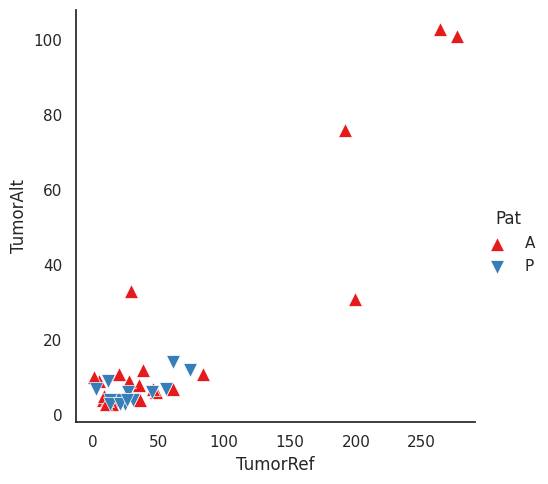

In [47]:
g = sns.FacetGrid(mutation_data, hue="Pat", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "TumorRef", "TumorAlt", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

#### gridplot

/home/ctg/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ctg/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/ctg/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/ctg/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/ctg/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be 

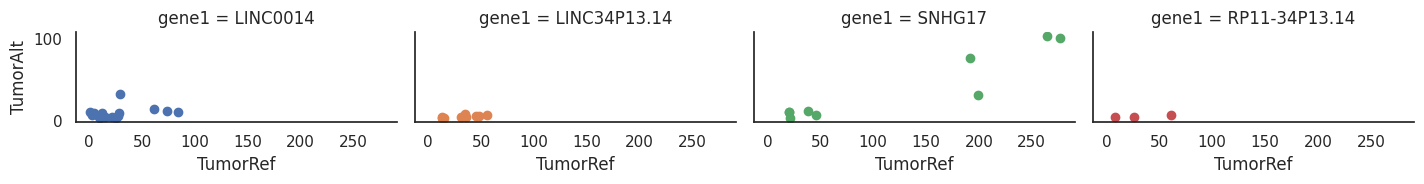

In [51]:
sns.set_context(rc={"figure.figsize": (10, 10)})
g =sns.FacetGrid(mutation_data, col="gene1", hue="gene1",size=2, aspect=1.8,col_wrap=4)
#size = 100 * (mutation_data.TumorRef / mutation_data.TumorAlt.max())
g = (g.map(plt.scatter, "TumorRef", "TumorAlt"))

/home/ctg/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


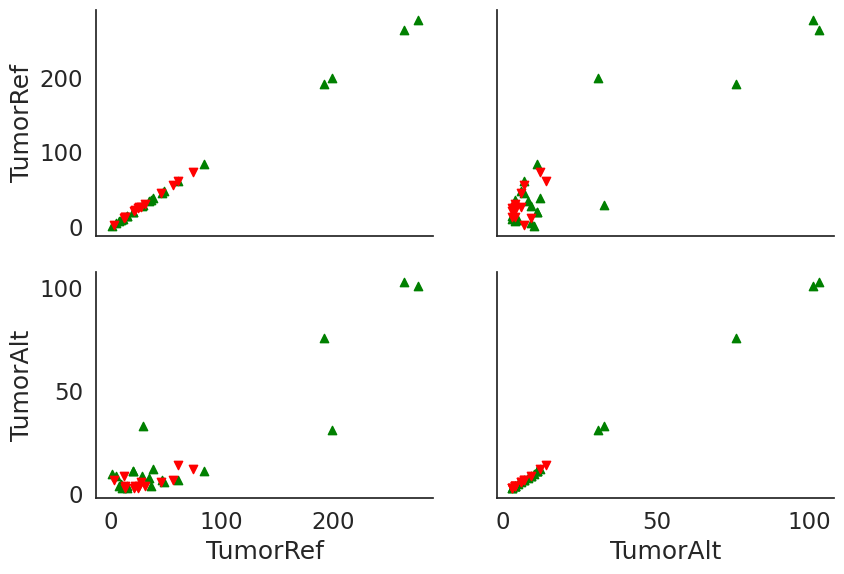

In [52]:
sns.set(font_scale=1.5,font='bold')
#sns.s
sns.set_style("white")
sns.set_context(rc={"figure.figsize": (13, 8)})
g = sns.PairGrid(mutation_data, vars=["TumorRef", "TumorAlt"],hue="Pat",
                 palette=dict(P="red", A="green"),hue_kws={"marker": ["^", "v"]},aspect=1.5,size=3)
g.map(plt.scatter);

## Word cloud

In [95]:
# Concatenate pathways names into a single string
pathways =" ".join(list(set(mutation_data['pathway'])))
pathways

'JAK-STAT Hippo P53'

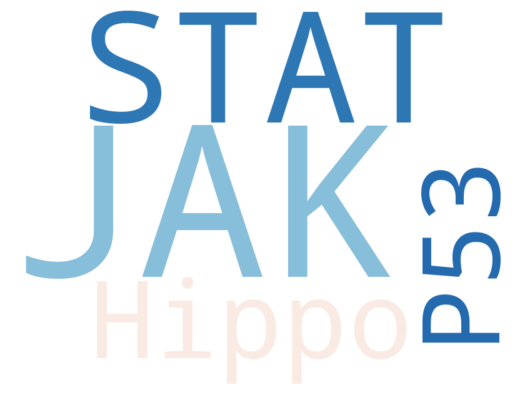

In [104]:
# create the word object
wc = WordCloud()
# then call generate_from_text:
wordcloud = WordCloud(max_font_size=60).generate(pathways)
# Set stopwords
stopwords = set(STOPWORDS)
#stopwords.update(["NaN"])
# Generate a word cloud object
wordcloud = WordCloud(width=800, height=600, background_color='white',stopwords=None,contour_width=2, contour_color='blue', colormap='RdBu', random_state=None).generate(pathways)
# Plot the word cloud
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# Save the word cloud image
plt.savefig("mutations.png", dpi=300)
# Display the plot
plt.show()

## sankey plot

In [80]:
def generateSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    """
    The function to convert the format of the input datfarme for the sankey plot
    """
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#EFF9DA','#CBE4F9','#F9D8D6','#D6CDEA','#f0e442','#fffbf2']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [55]:
mutation_data

,chrom,start,end,ref,alt,TumorRef,TumorAlt,NormalRef,NormalAlt,Read_depth_tumor,gene_type,Protein_coding,No_PC_overlap,Sample,Pat,gene1,Sample1,Recurrence,VAF_tumor,recurrence
26,1,137013,137013,T,C,15,4,11,0,RP11-34P13.14,antisense,True,False,AL18,A,LINC0014,AL18,20.0,0.15,49
10,1,137515,137515,T,C,56,7,58,1,RP11-34P13.14,antisense,True,False,PE04,P,LINC34P13.14,PE04,20.0,0.10,45
29,1,136048,136048,C,T,5,9,38,0,RP11-34P13.14,antisense,True,False,AL06,A,LINC0014,AL06,20.0,0.10,44
18,1,139213,139213,A,G,264,103,82,1,RP11-34P13.14,antisense,True,False,AE05,A,SNHG17,AE05,20.0,0.09,41
6,1,137588,137588,A,C,15,3,47,1,RP11-34P13.14,antisense,True,False,AE14,A,LINC34P13.14,AE14,20.0,0.37,41
3,1,137515,137515,T,C,36,4,30,1,RP11-34P13.14,antisense,True,False,AL12,A,LINC34P13.14,AL12,20.0,0.27,40
0,1,137334,137334,C,T,8,4,10,0,RP11-34P13.14,antisense,True,False,AE04,A,RP11-34P13.14,AE04,20.0,0.02,39
32,1,137825,137825,G,A,1,10,47,0,RP11-34P13.14,antisense,True,False,AL06,A,LINC0014,AL06,20.0,0.02,38
16,1,137302,137302,G,A,38,12,11,0,RP11-34P13.14,antisense,True,False,AE05,A,SNHG17,AE05,20.0,0.31,38
28,1,138156,138156,G,T,3,7,27,0,RP11-34P13.14,antisense,True,False,PE09,P,LINC0014,PE09,20.0,0.11,36


### create the count column


In [78]:
counts_mu = mutation_data.drop_duplicates().groupby(['gene1','gene_type','sex','Pat','pathway'],dropna=False)['gene1'].count().reset_index(name="count")
counts_mu

,gene1,gene_type,sex,Pat,pathway,count
0,LINC0014,intergenic,Female,A,JAK-STAT,2
1,LINC0014,intergenic,Female,A,P53,1
2,LINC0014,intergenic,Female,P,Hippo,1
3,LINC0014,intergenic,Female,P,JAK-STAT,2
4,LINC0014,intergenic,Female,P,P53,1
5,LINC0014,intergenic,Male,A,Hippo,1
6,LINC0014,intergenic,Male,A,JAK-STAT,3
7,LINC0014,intergenic,Male,A,P53,2
8,LINC0014,intergenic,Male,P,Hippo,1
9,LINC0014,intergenic,Male,P,P53,2


In [81]:
data=generateSankey(counts_mu,cat_cols=['gene1','gene_type','sex','Pat','pathway'],value_cols='count',title='Word Etymology')

In [90]:

# override gray link colors with 'source' colors
opacity = 1.2
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(128, 128, 0, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]
fig = go.Figure(data=[go.Sankey(
    valueformat = None,
    valuesuffix = None,
    # Define nodes
    node = dict(
      pad = 100,
      thickness = 2,
      line = dict(color = "black", width = 0.2),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      
      #label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Mutation data of lncRNAs in ALL",
                  font_size=12)

# save this file as a standalong html file:
fig.write_html("sankey_mutations.html")